# Recurrent Neural Network (RNN)

In this i am going to use RNN to classify Handwritten numbers.

## Importing, Preparing and Visualizing Data

Train labels {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


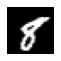

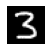

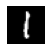

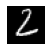

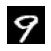

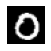

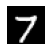

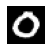

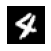

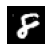

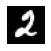

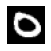

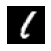

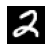

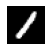

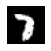

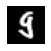

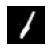

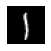

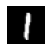

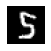

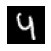

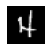

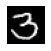

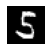

In [1]:
import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()

import matplotlib.pyplot as plt
import numpy as np

# Count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels", dict(zip(unique, counts)))

# Count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels", dict(zip(unique, counts)))

# Sample from train data set
indexes = np.random.randint(0, x_train.shape[0], size = 25)

images = x_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(5,5))

for i in range (len(indexes)):
    plt.subplot(5, 5, i+1)
    image = images[i]
    plt.imshow(image, cmap = "gray")
    plt.axis("off")
    plt.show()
    plt.close("all")

num_labels = len(np.unique(y_test))

## Building model and Training it

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]

x_train = np.reshape(x_train, [-1, image_size, image_size]).astype("float32")/255
x_test = np.reshape(x_test, [-1, image_size, image_size]).astype("float32")/255

input_shape = (image_size,image_size)
from tensorflow.keras.models import Sequential
model = Sequential()

from tensorflow.keras.layers import Dense, Activation, SimpleRNN

model.add(SimpleRNN(256, dropout=0.2, input_shape = input_shape))
model.add(Dense(num_labels))
model.add(Activation("softmax"))

model.summary()

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=128, epochs = 20, validation_data=(x_test,y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 256)               72960     
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 53s 109ms/step - loss: 1.1884 - accuracy: 0.6380 - val_loss: 0.3233 - val_accuracy: 0.9101
Epoch 2/20
228/469 [=============>................] - ETA: 26s - loss: 0.3622 - accuracy: 0.8935

## Visualizing loss and val loss

Note: It shows that if model is overfitting or not.
      If val_loss line is making "U" or went far upward than loss it means the model is overfitting.

In [ ]:
import pandas as pd
history = pd.DataFrame(model.history.history)
history[["loss", "val_loss"]].plot()

## Prediction

In [ ]:
my_number = x_test[1558]
plt.imshow(my_number.reshape(28,28))
np.argmax(model.predict(my_number.reshape(-1, image_size, image_size)))

In [ ]:
my_number = x_train[2254]
plt.imshow(my_number.reshape(28,28))
np.argmax(model.predict(my_number.reshape(-1, image_size, image_size)))

In [ ]:
my_number = x_train[38255]
plt.imshow(my_number.reshape(28,28))
np.argmax(model.predict(my_number.reshape(-1, image_size, image_size)))